In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
from PIL import Image
import cv2

%matplotlib inline

In [2]:
# Configs

w_dil = 5 # Dilation of width in percentage of width
h_dil = 2 # Dilation of height in percentage of height
#Image path, purely for demonstration.
impath = 'demo_images/Hindi1.jpg'


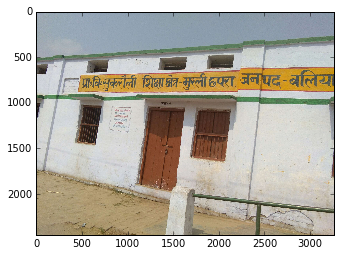

In [3]:
img = mpimg.imread(impath)
plt.imshow(img)

In [4]:
width = img.shape[1]
height = img.shape[0]
print('width: ', width, 'height: ', height)

width:  3264 height:  2448


(2448, 3264, 3)


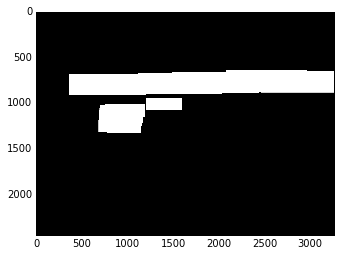

In [23]:
import json
import pprint

ones = np.zeros((height, width, 3))
print(ones.shape)

json_out = open('static/results/11060ede-2b64-11e8-bd69-e4f89ca942b4/result.json').read()
data = json.loads(json_out)
# pprint.pprint(data['text_lines'])

for box in data['text_lines']:
    x0,x1, x2, x3 = int(box['x0']), int(box['x1']), int(box['x2']), int(box['x3'])
    x = min(x0,x1,x2,x3)-int(0.01*w_dil*width)
    xx = max(x0,x1,x2,x3)+int(0.01*w_dil*width)
    y0,y1, y2, y3 = int(box['y0']), int(box['y1']), int(box['y2']), int(box['y3'])
    y = min(y0,y1,y2,y3)-int(0.01*h_dil*height)
    yy = max(y0,y1,y2,y3)+int(0.01*h_dil*height)
    ones[y:yy, x:xx]=[1,1,1]
plt.imshow(ones)

plt.savefig('out2.png', bbox_inches='tight', pad_inches=0)

[array([[[304,  78]],

       [[303,  79]],

       [[302,  80]],

       ...,

       [[307,  78]],

       [[306,  78]],

       [[305,  78]]], dtype=int32), array([[[1, 1]],

       [[1, 2]],

       [[1, 3]],

       ...,

       [[4, 1]],

       [[3, 1]],

       [[2, 1]]], dtype=int32)]


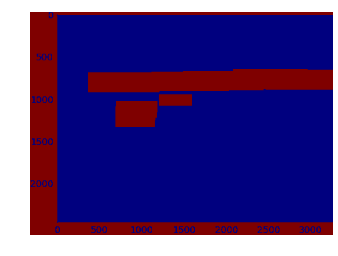

In [27]:
img = cv2.imread('out2.png')
plt.imshow(new_img)
img_final = cv2.imread('out2.png')
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)  # for black text , cv.THRESH_BINARY_INV
'''
        line  8 to 12  : Remove noisy portion 
'''
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                     3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
dilated = cv2.dilate(new_img, kernel, iterations=9)  # dilate , more the iteration more the dilation

# for cv2.x.x

_, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # get contours
# plt.imshow(img)
print(contours)
# for cv3.x.x comment above line and uncomment line below

#image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

index = 0
for contour in contours:
    # get rectangle bounding contour
    [x, y, w, h] = cv2.boundingRect(contour)

    # Don't plot small false positives that aren't text
    if w < 35 and h < 35:
        continue

    # draw rectangle around contour on original image
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

    #you can crop image and send to OCR  , false detected will return no text :)
    cropped = img_final[y :y +  h , x : x + w]

    s = 'out' + '/crop_' + str(index) + '.jpg' 
#     cv2.imwrite(s , cropped)
    plt.axis('off')
    plt.imshow(cropped)
    plt.savefig('crop'+str(index)+'.png', )
    index = index + 1

# write original image with added contours to disk
# plt.imshow(cropped)
# cv2.waitKey()


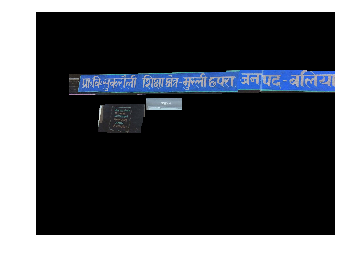

In [58]:
img = np.multiply(img, ones)
plt.imshow(img)
plt.axis('off')
plt.savefig('out2.png', bbox_inches='tight', pad_inches=0)